In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

### Graph

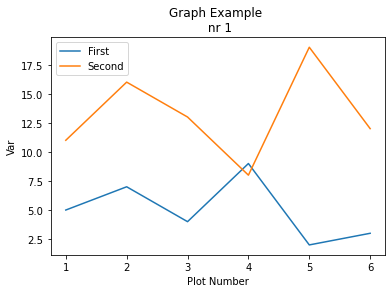

In [2]:
x = [1,2,3,4,5,6]
y = [5,7,4,9,2,3]

x2 = [1,2,3,4,5,6]
y2 = [11,16,13,8,19,12]

plt.plot(x,y, label = 'First')
plt.plot(x2,y2, label = 'Second')

plt.ylabel('Var')
plt.xlabel('Plot Number')
plt.title('Graph Example \n nr 1')
plt.legend()
plt.show()

### barplot

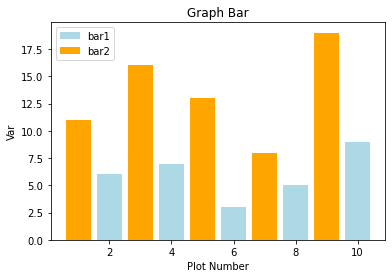

In [3]:
x = [2,4,6,8,10]
y = [6,7,3,5,9]

x2 = [1,3,5,7,9]
y2 = [11,16,13,8,19]

plt.bar(x,y, label = 'bar1', color = 'lightblue')
plt.bar(x2,y2, label = 'bar2', color = 'orange')


plt.ylabel('Var')
plt.xlabel('Plot Number')
plt.title('Graph Bar')
plt.legend()
plt.show()

### histogram

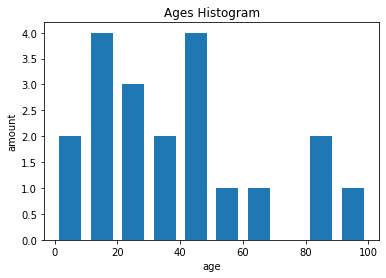

In [4]:
ages = [14,28,34,7,44,15,87,65,55,42,11,87,42,32,14,7,94,25,27,47]
bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(ages, bins, rwidth = 0.7)
plt.title('Ages Histogram')
plt.xlabel('age')
plt.ylabel('amount')
plt.show()

### Scatter

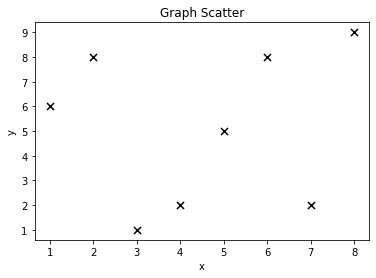

In [5]:
x = [1,2,3,4,5,6,7,8]
y = [6,8,1,2,5,8,2,9]
plt.scatter(x,y, color = 'k', marker = 'x', s = 50)

plt.title('Graph Scatter')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### StackPlot

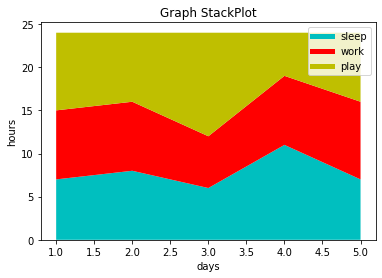

In [6]:
days = [1,2,3,4,5]
sleep = [7,8,6,11,7]
work = [8,8,6,8,9]
play = [9,8,12,5,8]

plt.stackplot(days,sleep, work, play, colors = ['c', 'r', 'y'])

plt.plot([],[], color = 'c', label = 'sleep',linewidth = 5)
plt.plot([],[], color = 'r', label = 'work',linewidth = 5)
plt.plot([],[], color = 'y', label = 'play',linewidth = 5)

plt.title('Graph StackPlot')
plt.xlabel('days')
plt.ylabel('hours')
plt.legend()
plt.show()

### Pie Chart

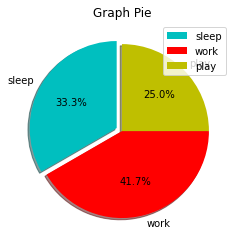

In [7]:
slices = [8,10,6]
activities = ['sleep', 'work', 'play']
plt.pie(slices, labels = activities, colors = ['c','r','y'], 
        startangle = 90, 
        shadow = True,
        explode=(0.07,0,0),
        autopct = '%1.1f%%'
       )

plt.title('Graph Pie')
plt.legend()
plt.show()

### reading from csv file

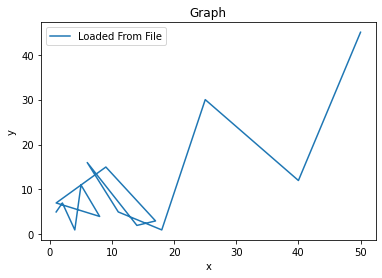

In [8]:
import csv
x=[]
y=[]

with open('example.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y, label = 'Loaded From File')

plt.title('Graph')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### reading from csv files using np

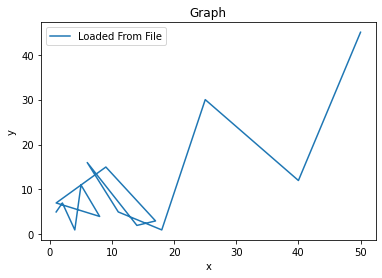

In [9]:
import numpy as np

x, y = np.loadtxt('example.txt', delimiter=',', unpack = True)

plt.plot(x,y, label = 'Loaded From File')
plt.title('Graph')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### data from internet

In [ ]:
import urllib
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    plt.plot_date(date, closep,'-', label='Price')
 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Graph')
    plt.legend()
    plt.show()


graph_data('TSLA')

### live graph and plotting on a pop up

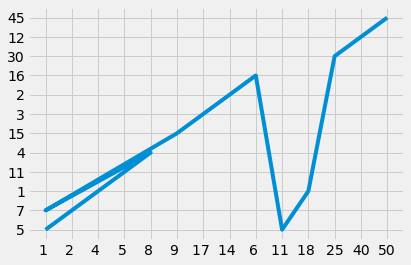

In [10]:
import matplotlib.animation as animation
from matplotlib import style

style.use('fivethirtyeight')
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('example.txt', 'r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(x)
            ys.append(y)
    ax1.clear()
    ax1.plot(xs,ys)

ani = animation.FuncAnimation(fig, animate, interval = 1000)
plt.show();

### subplots

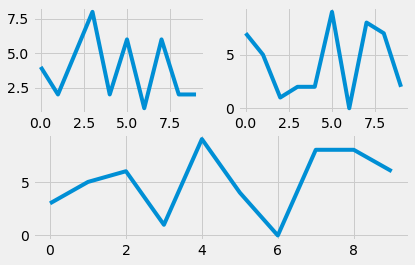

In [14]:
import random

style.use('fivethirtyeight')
fig = plt.figure()

def create_plots():
    xs = []
    ys = []
    
    for i in range(10):
        x = i
        y = random.randrange(10)
        
        xs.append(x)
        ys.append(y)
    return xs, ys
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

x,y = create_plots()
ax1.plot(x,y)
x,y = create_plots()
ax2.plot(x,y)
x,y = create_plots()
ax3.plot(x,y)
plt.show();

### 3D

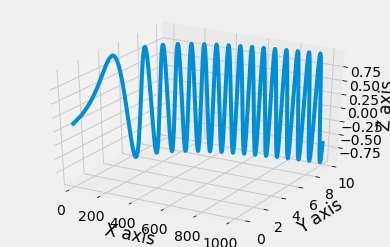

In [23]:
from mpl_toolkits.mplot3d import axes3d
import math

fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')
x = list(range(1,1000))
y = [math.log(i, 2) for i in x]
z = [math.sin(i/10) for i in x]

ax1.plot(x,y,z)
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

plt.show()

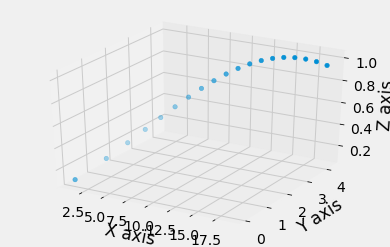

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')
x = list(range(1,20))
y = [math.log(i, 2) for i in x]
z = [math.sin(i/10) for i in x]

ax1.scatter(x,y,z)
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

plt.show()

### 3D barplot

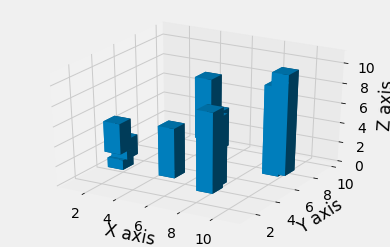

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')
x = [1,2,3,4,5,6,7,8,9,10]
y = [4,3,1,9,3,5,4,2,7,6]
z = [0,2,4,0,1,4,0,1,0,1]

dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(x,y,z,dx,dy,dz)

ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

plt.show()

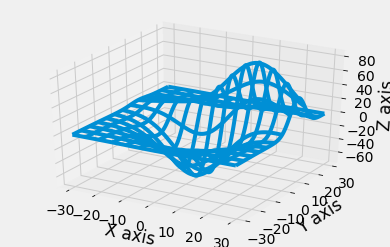

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')

x,y,z = axes3d.get_test_data()

ax1.plot_wireframe(x,y,z, rstride = 10, cstride = 10)

ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

plt.show()